2025.11.05
2025200105_김세은

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()

plt.rc('font', family=font_name)

In [ ]:
from pandas import *

happy_life=read_excel('대한민국행복지도_삶의만족도.xlsx')
happy_life.head()

happy_health=read_excel('대한민국행복지도_건강.xlsx')
happy_health.head()

happy_safe=read_excel('대한민국행복지도_안전.xlsx')
happy_safe.head()

happy_edu=read_excel('대한민국행복지도_교육.xlsx')
happy_edu.head()

happy_econo=read_excel('대한민국행복지도_경제.xlsx')
happy_econo.head()

happy_env=read_excel('대한민국행복지도_환경.xlsx')
happy_env.head()

happy_relation=read_excel('대한민국행복지도_관계및사회참여.xlsx')
happy_relation.head()

happy_vac=read_excel('대한민국행복지도_여가.xlsx')
happy_vac.head()

,No,시도,구군,평균,여가활용 만족도 b),노인 천명당 노인여가복지시설수,인구 십만명당 도서관수,인구 십만명당 문화기반시설수,인구 천명당 체육관련 여가시설수
0,1,서울특별시,종로구,0.6331,0.8409,0.1573,0.4523,0.9997,0.5559
1,2,서울특별시,중구,0.6691,0.6224,0.1467,0.5369,0.8441,0.9886
2,3,서울특별시,용산구,0.2817,0.6381,0.1628,0.2453,0.3715,0.2934
3,4,서울특별시,성동구,0.3257,0.5657,0.1859,0.3590,0.2768,0.4859
4,5,서울특별시,광진구,0.3313,0.6740,0.1443,0.2333,0.2058,0.6365


In [ ]:
city=list(happy_life['시도'].unique())
happy_merge=DataFrame({'시도' : city})
happy_merge

life=happy_life['삶의 만족도'].groupby(by=happy_life['시도']).mean()
happy_merge=merge(happy_merge, life, on='시도')
happy_merge.head()

health=happy_health['평균'].groupby(by=happy_health['시도']).mean()
happy_merge=merge(happy_merge, health.rename('건강'), on='시도')
happy_merge.head()

safe=happy_safe['평균'].groupby(by=happy_safe['시도']).mean()
happy_merge=merge(happy_merge, safe.rename('안전'), on='시도')
happy_merge.head()

edu=happy_edu['평균'].groupby(by=happy_edu['시도']).mean()
happy_merge=merge(happy_merge, edu.rename('교육'), on='시도')
happy_merge.head()

econo=happy_econo['평균'].groupby(by=happy_econo['시도']).mean()
happy_merge=merge(happy_merge, econo.rename('경제'), on='시도')
happy_merge.head()

env=happy_env['평균'].groupby(by=happy_env['시도']).mean()
happy_merge=merge(happy_merge, env.rename('환경'), on='시도')
happy_merge.head()

relation=happy_relation['평균'].groupby(by=happy_relation['시도']).mean()
happy_merge=merge(happy_merge, relation.rename('관계'), on='시도')
happy_merge.head()


,시도,삶의 만족도,건강,안전,교육,경제,환경,관계
0,서울특별시,0.490972,0.569532,0.552256,0.399412,0.532820,0.470712,0.390656
1,부산광역시,0.362081,0.511906,0.404875,0.504594,0.438038,0.448719,0.294719
2,대구광역시,0.363988,0.482325,0.358429,0.585838,0.393975,0.552500,0.407486
3,인천광역시,0.411480,0.339620,0.421020,0.502920,0.410820,0.515020,0.504920
4,광주광역시,0.484480,0.632300,0.266440,0.689680,0.387380,0.607480,0.637800


In [ ]:
happy_merge.describe()

happy_merge.mean(axis=0, numeric_only=True)

,0
삶의 만족도,0.518189
건강,0.409401
안전,0.420882
교육,0.578653
경제,0.407635
환경,0.579406
관계,0.497632


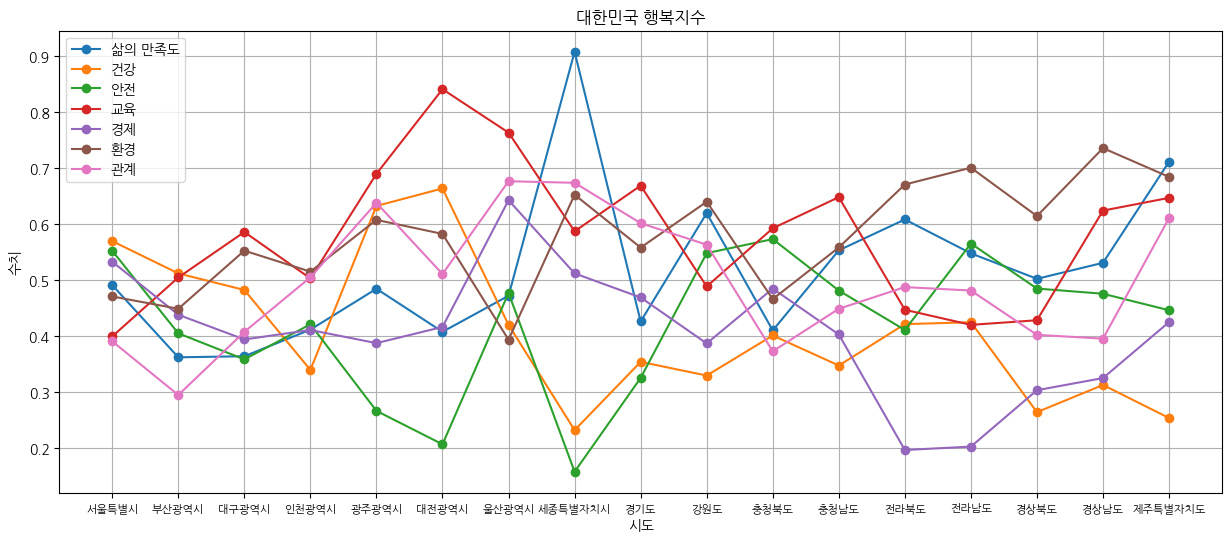

In [ ]:
plt.figure(figsize=(15, 6))

items=list(happy_merge.columns[1:9])
for a in items:
  chardata = happy_merge[a]
  plt.plot(chardata, marker='o', label=a)

plt.xlabel('시도')
plt.ylabel('수치')
plt.xticks(range(17), happy_merge['시도'], fontsize=8)
plt.title('대한민국 행복지수')
plt.legend()
plt.grid()
plt.show()

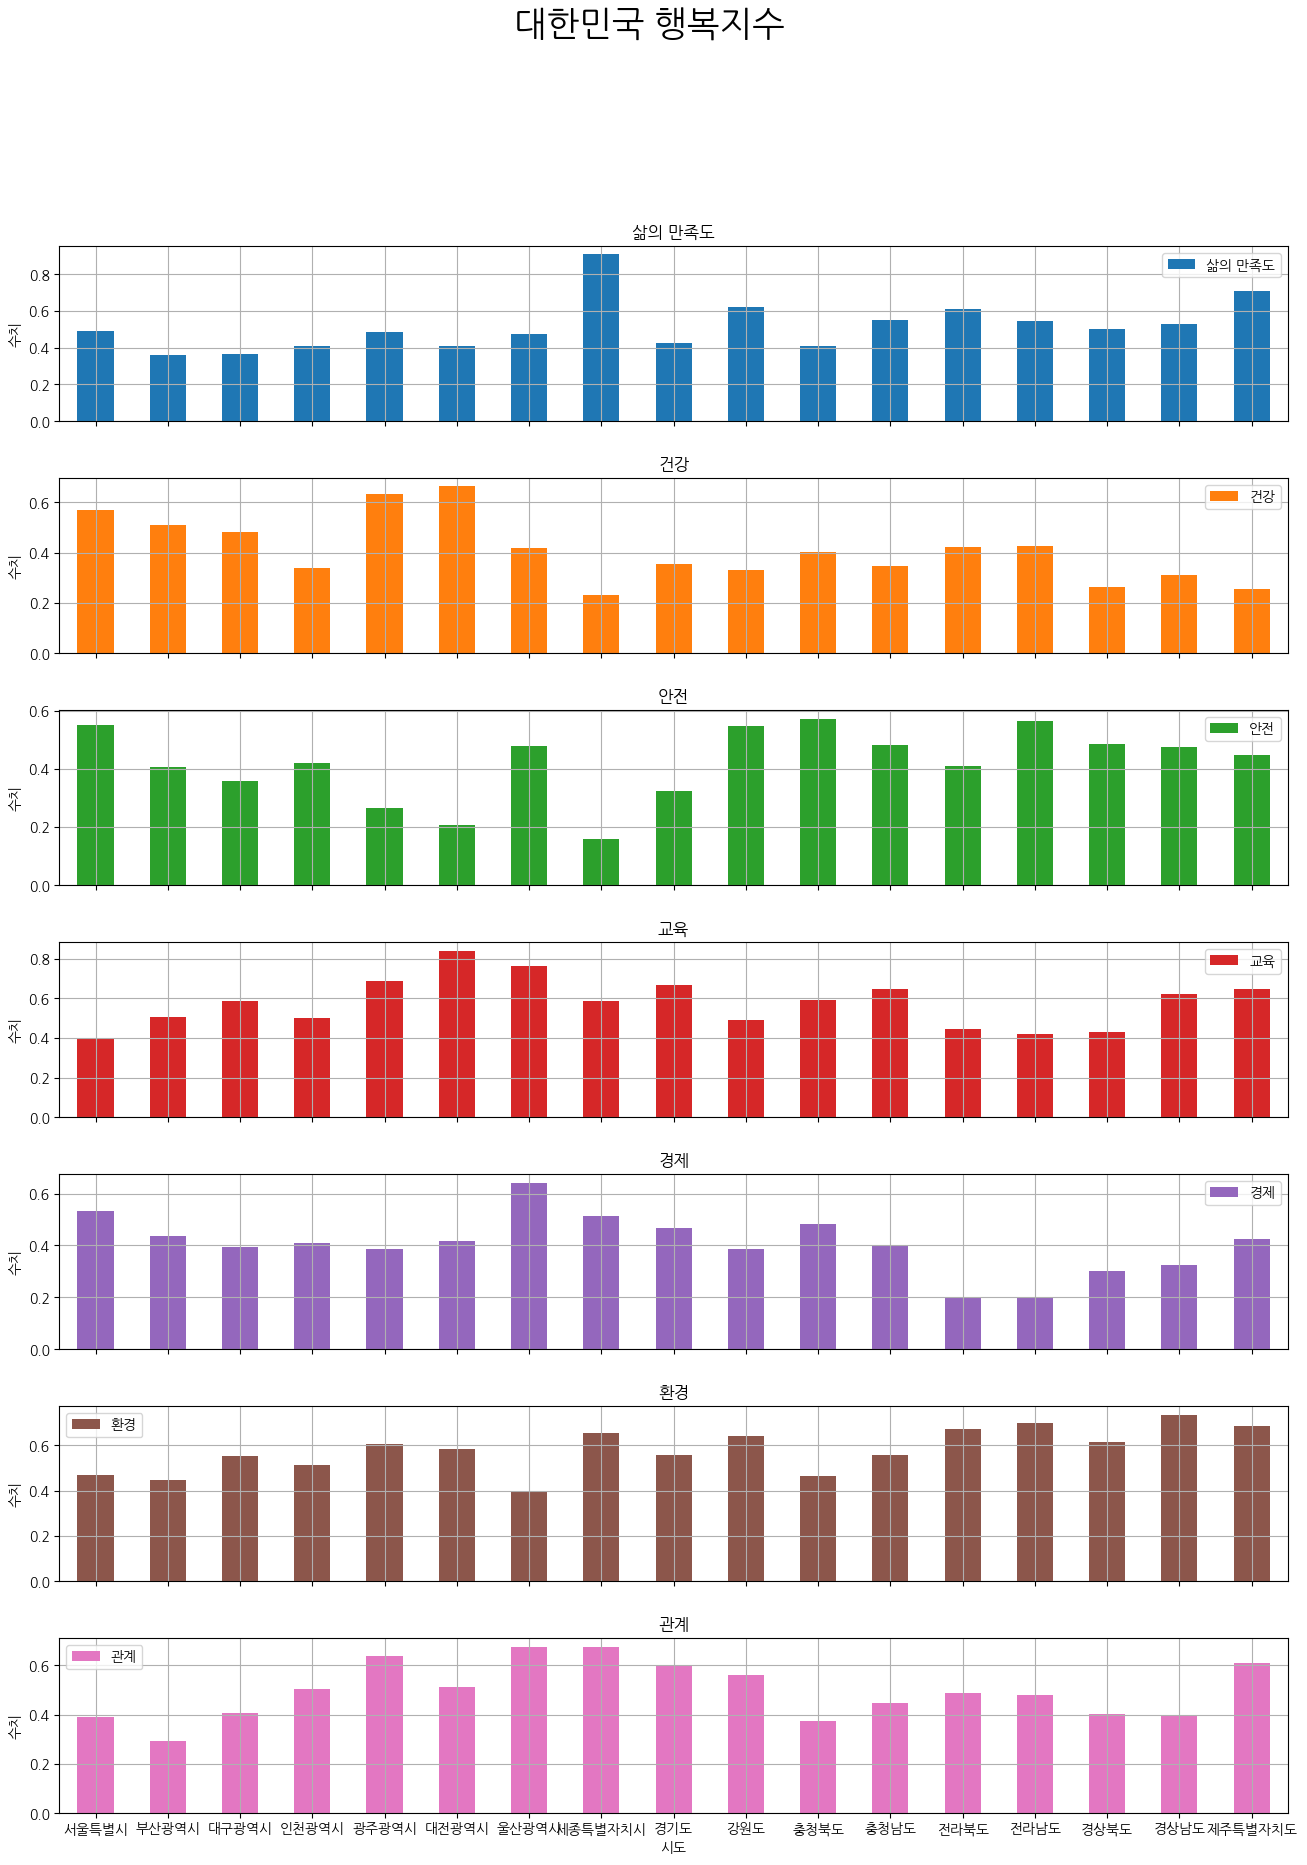

In [ ]:
from numpy import *

happy_merge.plot(kind='bar', xlabel='시도', ylabel='수치', figsize=(15, 20), grid=True, subplots=True)

plt.suptitle('대한민국 행복지수', fontsize=25)
plt.tight_layout(pad=8, h_pad=2)
plt.xticks(range(17), city, rotation=360)
plt.show()

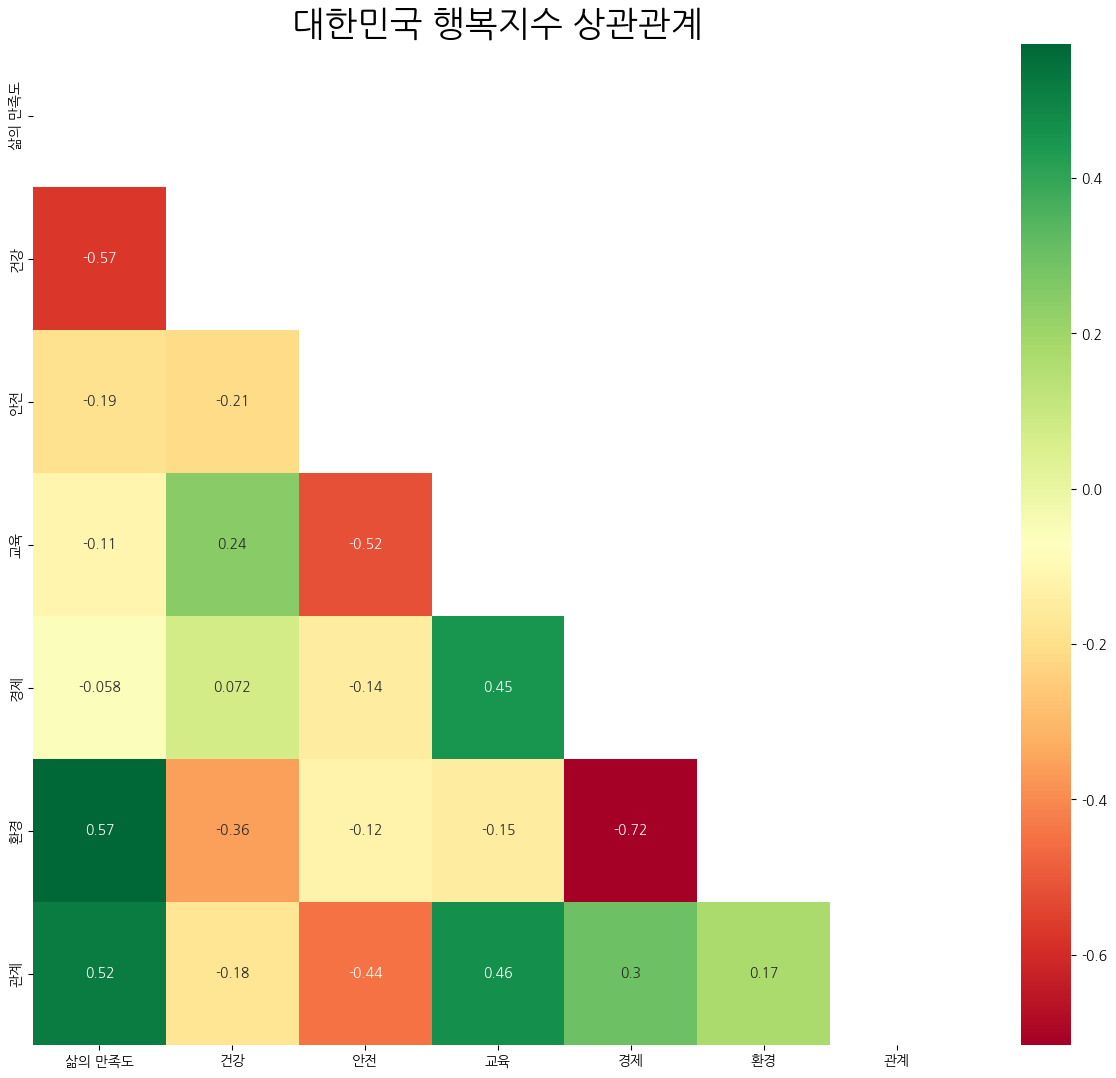

In [ ]:
plt.figure(figsize=(15, 13))
plt.title('대한민국 행복지수 상관관계', fontsize=25)
plt.rc('axes', unicode_minus=False)

correlation_mat = happy_merge.corr(numeric_only=True)
upp_mat = triu(correlation_mat)

sns.heatmap(correlation_mat, mask=upp_mat, annot=True, cmap='RdYlGn')
plt.show()

1. 가장 큰 양의 관계를 갖는 요인은 '삶의 만족도'와 '환경'이다. (0.57) 이는 좋은 환경은 삶의 만족도를 증가킬 확률이 높다는 뜻이다.
2. 가장 큰 음의 관계를 갖는 요인은 '경제'와 '환경'이다. (-0.72) 이는 나쁜 환경일 수록 경제가 좋을 확률이 높다는 뜻이다.
3. '삶의 만족도'와 '관계'는 두번째로 큰 양의 관계를 갖는다. (0.52) 이는 관계가 좋을 수록 삶의 만족도가 높다는 뜻이다.
4. '삶의 만족도'와 '건강'은 두번째로 큰 음의 관계를 갖는다. (-0.57) 이는 삶의 만족도가 높을 수록 건강이 나쁘다는 뜻이다.